<h1 style="margin-left: 200px;">Building Spotify  Data Pipeline</h1>
<img src='./spotify_arch.png'>
<h4 style="text-align: left;">Important Websites</h4>
<p><a href='https://developer.spotify.com/documentation/web-api'>Spotify Web API : </a>Retrieve metadata from Spotify content, control playback or get recommendations</p>
<p><a href='https://developer.spotify.com/documentation/web-api/concepts/apps'>Create an App : </a>The app provides, among others, the Client ID and Client Secret needed to implement any of the authorization flows.</p>
<p><a href='https://developer.spotify.com/documentation/web-api/concepts/authorization'>Authorization : </a>Authorization refers to the process of granting a user or application access permissions to Spotify data and features (e.g your application needs permission from a user to access their playlists).

<p>Spotify implements the OAuth 2.0 authorization framework.</p>
<img src='./spotify_auth.png' style="margin-left: 100px;">
<p><a href='https://developer.spotify.com/documentation/web-api/tutorials/code-flow'>Authorization Code Flow : </a> We use the authorization code flow  because it is suitable for long-running applications where the user grants permission only once.</p>

<p><a href='https://developer.spotify.com/documentation/web-api/concepts/scopes'>Scopes : </a>Scopes provide Spotify users using third-party apps the confidence that only the information they choose to share will be shared, and nothing more. </p>
<p> If the user is not logged in, they are prompted to do so using their Spotify credentials. When the user is logged in, they are asked to authorize access to the data sets or features defined in the scopes.</p>

<p><a href='https://developer.spotify.com/documentation/web-api/tutorials/refreshing-tokens'>Refreshing tokens :</a>Access tokens are intentionally configured to have a limited lifespan (1 hour), at the end of which, new tokens can be obtained by providing the original refresh token acquired during the authorization token request response.</p>

<p><a href='</p>https://pymongo.readthedocs.io/en/stable/examples/authentication.html'>PyMongo :  </a>PyMongo is a Python distribution containing tools for working with MongoDB, and is the recommended way to work with MongoDB from Python. This documentation attempts to explain everything you need to know to use PyMongo.</p>

<p><a href='</p>https://flask.palletsprojects.com/en/3.0.x/quickstart/#routing'>Flask :  </a>Flask is a micro web framework written in Python.</p>

In [34]:
from flask import Flask, redirect, request
import pymongo
from pymongo import MongoClient
import logging as logger
import pandas as pd
import requests
import json
from datetime import datetime, timedelta
from urllib.parse import quote_plus
import os
from dotenv import load_dotenv
import pytz

In [35]:
# Load environment variables from a .env file
load_dotenv()

# Retrieve MongoDB connection string from environment variable
mongodb_connection_string = os.getenv('MONGODB_CONNECTION_STRING')
client = MongoClient(mongodb_connection_string)

In [36]:
client.list_database_names()

['admin', 'config', 'employees', 'local']

In [37]:
db = client.employees 
db

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'employees')

In [38]:
db.list_collection_names()

['spotify_songs', 'staff']

In [39]:
collection = db.spotify_songs

In [40]:
# Read token_info data from the JSON file
with open('./token_info.json', 'r') as json_file:
    token_info = json.load(json_file)

In [41]:
token = token_info['access_token']
headers =  ''

In [42]:
# Set up logging
logger.basicConfig(filename='spotify_api.log', level=logger.DEBUG)

In [43]:
# Set up requests logger to capture HTTP requests
requests_log = logger.getLogger("requests.packages.urllib3")
requests_log.setLevel(logger.DEBUG)
requests_log.propagate = True

In [44]:
def fetch_web_api(endpoint, method='GET', body=None):
    headers = {'Authorization': f'Bearer {token}'}
    url = f'https://api.spotify.com/{endpoint}'
    
    # Log the request information
    logger.debug(f"Sending {method} request to {url} with headers {headers} and body {body}")

    response = requests.request(method, url, headers=headers, json=body)
    
    # Log the response information
    logger.debug(f"Received response with status code {response.status_code} and content {response.text}")

    # print(response.json())
    return response.json()

In [45]:
today_date = datetime.now()
yesterday_date = today_date - timedelta(days=4)
yesterday_date_ux = int(yesterday_date.timestamp()) * 1000
yesterday_date.timestamp()
yesterday_date_ux

1700755685000

In [46]:

def recently_played():
    try:
        # Endpoint reference: https://developer.spotify.com/documentation/web-api/reference/
        # endpoint = 'v1/me/following?type=artist&limit=50'
        # endpoint = 'v1/me/top/tracks'
        # endpoint = 'v1/browse/featured-playlists'
        endpoint = 'v1/me/player/recently-played?after={time}&limit=50'.format(time=yesterday_date_ux, headers=headers)
        return fetch_web_api(endpoint)
    
    except Exception as e:
        logger.error(f"Error while fetching top tracks: {e}")
        return None

In [47]:
recently_played_tracks = recently_played()
# recently_played_tracks['artists']['items']
# recently_played_tracks['items'][0]
recently_played_tracks['items'][0]['track']['artists'][0]['name']

'Lorde'

In [48]:
# Convert the JSON data to a formatted string
formatted_json = json.dumps(recently_played_tracks)
formatted_json

'{"items": [{"track": {"album": {"album_type": "album", "artists": [{"external_urls": {"spotify": "https://open.spotify.com/artist/163tK9Wjr9P9DmM0AVK7lm"}, "href": "https://api.spotify.com/v1/artists/163tK9Wjr9P9DmM0AVK7lm", "id": "163tK9Wjr9P9DmM0AVK7lm", "name": "Lorde", "type": "artist", "uri": "spotify:artist:163tK9Wjr9P9DmM0AVK7lm"}], "available_markets": ["AR", "AU", "AT", "BE", "BO", "BR", "BG", "CA", "CL", "CO", "CR", "CY", "CZ", "DK", "DO", "DE", "EC", "EE", "SV", "FI", "FR", "GR", "GT", "HN", "HK", "HU", "IS", "IE", "IT", "LV", "LT", "LU", "MY", "MT", "MX", "NL", "NZ", "NI", "NO", "PA", "PY", "PE", "PH", "PL", "PT", "SG", "SK", "ES", "SE", "CH", "TW", "TR", "UY", "US", "GB", "AD", "LI", "MC", "ID", "TH", "VN", "RO", "IL", "ZA", "SA", "AE", "BH", "QA", "OM", "KW", "EG", "MA", "DZ", "TN", "LB", "JO", "PS", "IN", "BY", "KZ", "MD", "UA", "AL", "BA", "HR", "ME", "MK", "RS", "SI", "KR", "BD", "PK", "LK", "GH", "KE", "NG", "TZ", "UG", "AG", "AM", "BS", "BB", "BZ", "BT", "BW", "BF",

In [49]:
# if 'artists' in following_artists:
#     num_of_ff = 0
#     for track in following_artists['artists']['items']:
#         # print(track)
#         artist_name = track['name']
#         followers = track['followers']['total']
#         num_of_ff = num_of_ff + 1
#         print(f"{artist_name} have {followers} followers")
        
#     print(f'You follow {num_of_ff} artists!')

In [50]:
# if 'items' in top_played_tracks:
#     for track in top_played_tracks['items']:
#         name = track['name']
#         artists = ', '.join(artist['name'] for artist in track['artists'])
#         print(f"{name} by {artists}")

In [51]:
date_format = "%Y-%m-%dT%H:%M:%S"

def convert_utc_to_local(utc_time_str, local_timezone):
    date_time_utc = datetime.strptime(utc_time_str, date_format).replace(tzinfo=pytz.UTC)
    date_time_local = date_time_utc.astimezone(pytz.timezone(local_timezone))
    return date_time_local


In [52]:
if 'items' in recently_played_tracks:
    for track in recently_played_tracks['items']:
        artists_name = [artist['name'] for artist in track['track']['artists']]
        artists_names = ', '.join(artists_name)
        song_name = track['track']['album']['name']
        # Extract the first 19 characters to get the datetime string
        played_at_time = track['played_at'][:19]
        # Convert UTC to local time (UTC+3)
        played_local_time = convert_utc_to_local(played_at_time, 'Etc/GMT-3')
        # Format the datetime without timezone offset
        played_local_time = played_local_time.strftime("%Y-%m-%d %H:%M:%S")
        print(f"{song_name} by "
              f"{artists_names} played at  "
              f"{played_local_time}")

Pure Heroine by Lorde played at  2023-11-27 12:13:57
Me 4 U by OMI played at  2023-11-27 12:09:41
I AM...SASHA FIERCE by Beyoncé played at  2023-11-27 12:06:40
The 20/20 Experience (Deluxe Version) by Justin Timberlake played at  2023-11-27 12:02:01
Up All Night by One Direction played at  2023-11-27 11:52:22
18 Months by Calvin Harris played at  2023-11-27 11:45:58
Wanted on Voyage (Expanded Edition) by George Ezra played at  2023-11-27 11:42:30
Feel Good Friday by Train played at  2023-11-27 11:39:09
Get Lucky (Radio Edit) [feat. Pharrell Williams and Nile Rodgers] by Daft Punk, Pharrell Williams, Nile Rodgers played at  2023-11-27 11:34:28
x (Deluxe Edition) by Ed Sheeran played at  2023-11-27 11:30:19
Night Visions (Deluxe) by Imagine Dragons played at  2023-11-27 11:26:00
Bad Blood by Bastille played at  2023-11-27 11:22:50
Views by Drake, Wizkid, Kyla played at  2023-11-27 11:18:47
Doo-Wops & Hooligans by Bruno Mars played at  2023-11-27 11:15:53
Don't Kill the Magic by MAGIC! pl

In [53]:
song_names = []
artist_names = []
played_at_list = []
if 'items' in recently_played_tracks:
    for track in recently_played_tracks['items']:
        # print(track)
        artist_names.append(track['track']['artists'][0]['name'])
        song_names.append(track['track']['album']['name'])
        played_at_time = track['played_at'][:19]
        # Convert UTC to local time (UTC+3)
        played_local_time = convert_utc_to_local(played_at_time, 'Etc/GMT-3')
        # Format the datetime without timezone offset
        played_local_time = played_local_time.strftime("%Y-%m-%d %H:%M:%S")        
        played_at_list.append(played_local_time)
               
print(f"{song_names} \n {artist_names} \n {played_at_list}")

['Pure Heroine', 'Me 4 U', 'I AM...SASHA FIERCE', 'The 20/20 Experience (Deluxe Version)', 'Up All Night', '18 Months', 'Wanted on Voyage (Expanded Edition)', 'Feel Good Friday', 'Get Lucky (Radio Edit) [feat. Pharrell Williams and Nile Rodgers]', 'x (Deluxe Edition)', 'Night Visions (Deluxe)', 'Bad Blood', 'Views', 'Doo-Wops & Hooligans', "Don't Kill the Magic", 'Waves (Robin Schulz Radio Edit)', 'Faith', 'Spinback', 'Pon Mi - Single', 'Donda', 'PARKING LOT', 'The Marshall Mathers LP', 'Encore (Deluxe Version)', 'Recovery', 'Curtain Call: The Hits (Deluxe Edition)', 'Tuyo (Narcos Theme) [A Netflix Original Series Soundtrack]', 'Game Of Thrones: Season 8 (Music from the HBO Series)', 'Bells', 'Cristale x TeeZandos x Fumez The Engineer - Plugged In', 'Cristale x TeeZandos x Fumez The Engineer - Plugged In', 'Tears of Gold', 'CITIZENS', 'Prayer in C', 'Prayer in C'] 
 ['Lorde', 'OMI', 'Beyoncé', 'Justin Timberlake', 'One Direction', 'Calvin Harris', 'George Ezra', 'Train', 'Daft Punk', '

In [54]:
song_dict = {
            "song_name" : song_names,
            "artist_name": artist_names,
            "played_at" : played_at_list,
}

In [55]:
songs_df = pd.DataFrame(song_dict, columns=["song_name", "artist_name","played_at"])

In [56]:
songs_df["played_at"] = pd.to_datetime(songs_df["played_at"]).dt.strftime('%d/%m/%y')
songs_df["song_name"] = songs_df["song_name"].astype('str')
songs_df["artist_name"] = songs_df["artist_name"].astype('str')

In [57]:
# songs_df

In [58]:
# db.spotify_songs.insert_many(songs_df.to_dict('records'))

In [59]:
songs_df['identity'] = 1

In [60]:
# songs_df.groupby('song_name').count()

In [61]:
# songs_df = songs_df.groupby('song_name').count()


In [62]:
songs_df

,song_name,artist_name,played_at,identity
0,Pure Heroine,Lorde,27/11/23,1
1,Me 4 U,OMI,27/11/23,1
2,I AM...SASHA FIERCE,Beyoncé,27/11/23,1
3,The 20/20 Experience (Deluxe Version),Justin Timberlake,27/11/23,1
4,Up All Night,One Direction,27/11/23,1
5,18 Months,Calvin Harris,27/11/23,1
6,Wanted on Voyage (Expanded Edition),George Ezra,27/11/23,1
7,Feel Good Friday,Train,27/11/23,1
8,Get Lucky (Radio Edit) [feat. Pharrell William...,Daft Punk,27/11/23,1
9,x (Deluxe Edition),Ed Sheeran,27/11/23,1


In [63]:

songs_df = songs_df.drop(['artist_name', 'played_at'], axis=1)

In [64]:
songs_df

,song_name,identity
0,Pure Heroine,1
1,Me 4 U,1
2,I AM...SASHA FIERCE,1
3,The 20/20 Experience (Deluxe Version),1
4,Up All Night,1
5,18 Months,1
6,Wanted on Voyage (Expanded Edition),1
7,Feel Good Friday,1
8,Get Lucky (Radio Edit) [feat. Pharrell William...,1
9,x (Deluxe Edition),1


In [65]:
songs_df = songs_df.groupby(['song_name']).size()

In [66]:
songs_df

song_name
18 Months                                                            1
Bad Blood                                                            1
Bells                                                                1
CITIZENS                                                             1
Cristale x TeeZandos x Fumez The Engineer - Plugged In               2
Curtain Call: The Hits (Deluxe Edition)                              1
Don't Kill the Magic                                                 1
Donda                                                                1
Doo-Wops & Hooligans                                                 1
Encore (Deluxe Version)                                              1
Faith                                                                1
Feel Good Friday                                                     1
Game Of Thrones: Season 8 (Music from the HBO Series)                1
Get Lucky (Radio Edit) [feat. Pharrell Williams and Nile Rodgers]  

/home/izzy/anaconda3/envs/web-scrapping/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/izzy/anaconda3/envs/web-scrapping/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/izzy/anaconda3/envs/web-scrapping/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


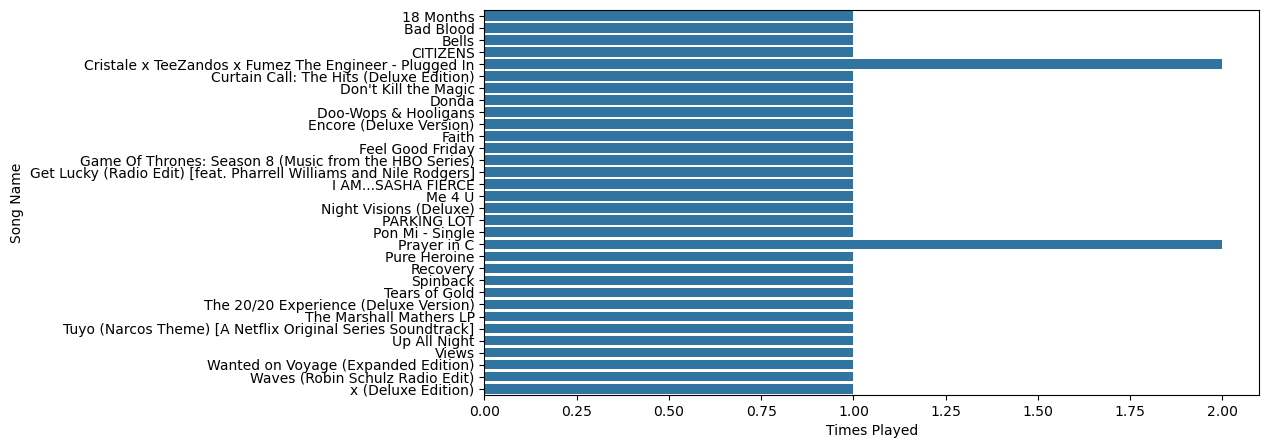

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,5])
sb.barplot(x=songs_df.values, y = songs_df.index, color=base_color);
plt.ylabel('Song Name');
plt.xlabel('Times Played');
